Import

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.stats import norm
from sklearn.metrics import f1_score

Pobranie danych

In [3]:
data = loadmat('ex8data1.mat')
X = data['X']

Wizualizacja danych

Ilość cech:  (307, 2)


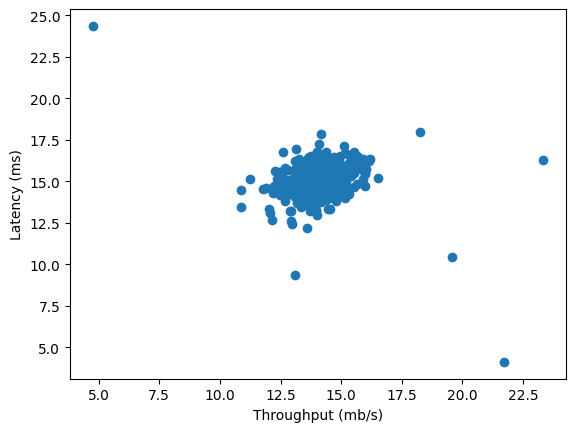

In [7]:
print("Ilość cech: ", X.shape)
plt.scatter(X[:,0 ],X[:,1], marker='o')
plt.ylabel('Latency (ms)')
plt.xlabel('Throughput (mb/s)')
plt.show()

Histogram

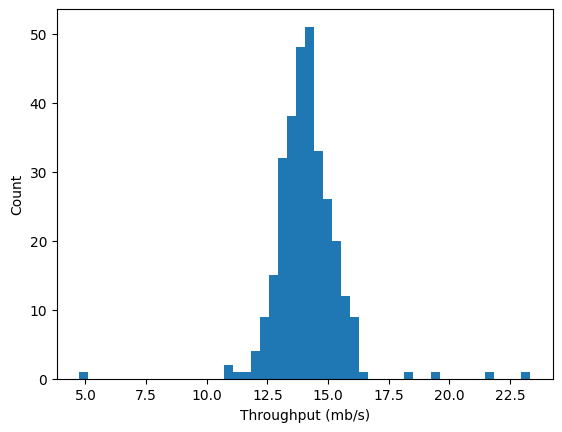

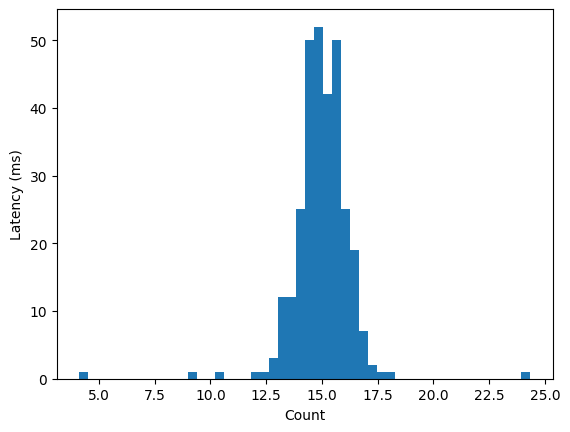

In [12]:
plt.hist(X[:,0], bins=50)
plt.xlabel('Throughput (mb/s)')
plt.ylabel('Count')
plt.show()

plt.hist(X[:,1], bins=50)
plt.ylabel('Latency (ms)')
plt.xlabel('Count')
plt.show()

Rozkład Gaussa

In [92]:
def estimate_gaussian(X):
    mu = X.mean(axis=0)
    #policz odchylenei standardowe
    sigma = np.std(X, axis=0)
    return mu, sigma

X_result = estimate_gaussian(X)
print("Parametry rozkładu Gaussa: ", X_result)

Parametry rozkładu Gaussa:  (array([14.11222578, 14.99771051]), array([1.35374717, 1.3075723 ]))


Wyznaczenie wartości rozkładu prawdopodobieństwa

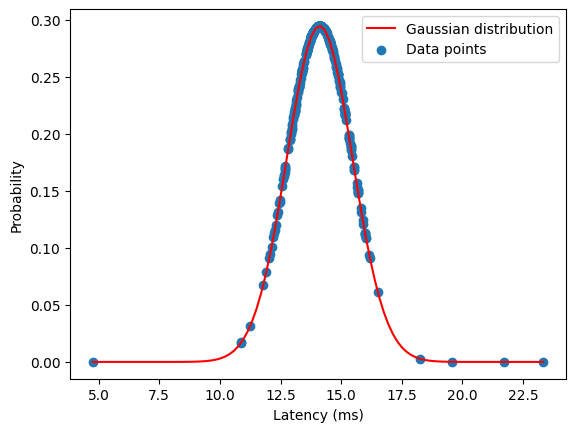

In [93]:
normal_dist = norm(X_result[0][0], X_result[1][0])
x = np.linspace(min(X[:,0]),max(X[:,0]),100)
plt.plot(x, normal_dist.pdf(x), 'r')
plt.scatter(X[:,0], normal_dist.pdf(X[:,0]), marker='o')
plt.xlabel('Latency (ms)')
plt.ylabel('Probability')
plt.legend(['Gaussian distribution', 'Data points'])
plt.show()



Xval data

Wymiar danych:  (307, 2) Ilość próbek w 1. klasie:  [9]


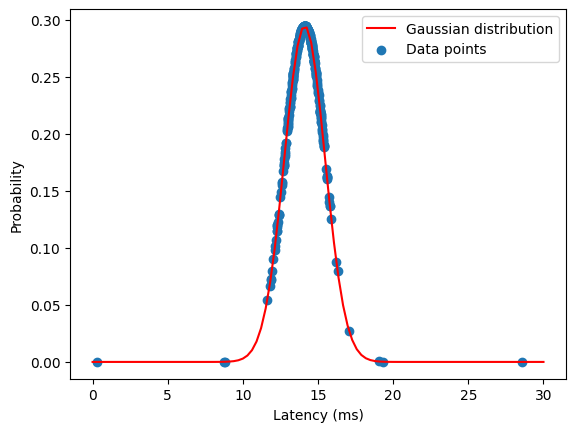

In [125]:
Xval = data['Xval']
yval = data['yval']

print("Wymiar danych: ",Xval.shape, "Ilość próbek w 1. klasie: ",sum(yval==1.0))

Xval_result = estimate_gaussian(Xval)
normal_dist = norm(X_result[0][0], X_result[1][0])
x = np.linspace(0,30,100)
#plotuj tylko punkty dla który yval wynosi 0
plt.plot(x, normal_dist.pdf(x), 'r')
plt.scatter(Xval[:,0], normal_dist.pdf(Xval[:,0]), marker='o')
plt.xlabel('Latency (ms)')
plt.ylabel('Probability')
plt.legend(['Gaussian distribution', 'Data points'])
plt.show()

Funkcja szukająca epsilon

In [104]:
def select_threshold(pva,yval):
    best_epsilon = 0
    best_f1 = 0
    f1 = 0
    step = (max(pva) - min(pva)) / 1000
    for epsilon in np.arange(min(pva), max(pva), step):
        predictions = pva < epsilon
        f1 = f1_score(yval, predictions, average='binary')
        if f1 > best_f1:
            best_f1 = f1
            best_epsilon = epsilon
    return best_epsilon, best_f1

Pierwsza cecha Xval

Epsilon:  0.0005893896390795363 F1 score:  0.8
(array([300, 301, 302, 303, 304, 306], dtype=int64),)


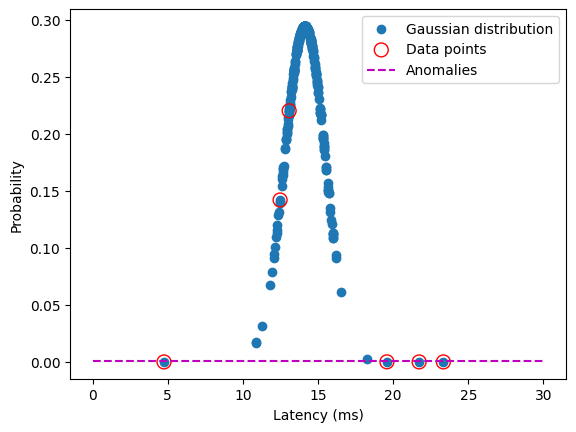

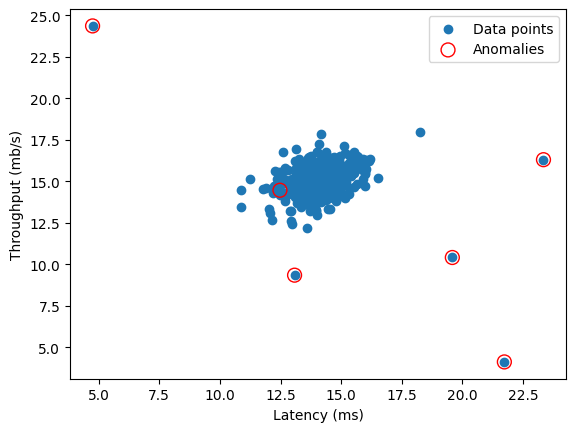

In [150]:
pval = normal_dist.pdf(Xval[:,0])
# plt.plot(np.linspace(0,30,np.size(pval,0)) ,list(pval), 'r')
# plt.show()
epsilon, f1 = select_threshold(pval, yval)
print("Epsilon: ", epsilon, "F1 score: ", f1)

outliers = np.where(pval < epsilon)
print(outliers)
normal_dist = norm(X_result[0][0], X_result[1][0])
plt.scatter(X[:,0], normal_dist.pdf(X[:,0]), marker='o')
plt.scatter(X[outliers,0], normal_dist.pdf(X[outliers,0]), edgecolors='r', facecolors='none', s=100)
plt.plot(np.linspace(0,30,100),epsilon*np.ones(100), 'm--')
plt.xlabel('Latency (ms)')
plt.ylabel('Probability')
plt.legend(['Gaussian distribution', 'Data points', 'Anomalies', 'Threshold'])
plt.show()



plt.scatter(X[:,0], X[:,1])
plt.scatter(X[outliers,0], X[outliers,1], edgecolors='r', facecolors='none', s=100)
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.legend(['Data points', 'Anomalies'])
plt.show()


Druga cecha Xval

Epsilon:  0.011787695564224493 F1 score:  0.5714285714285714


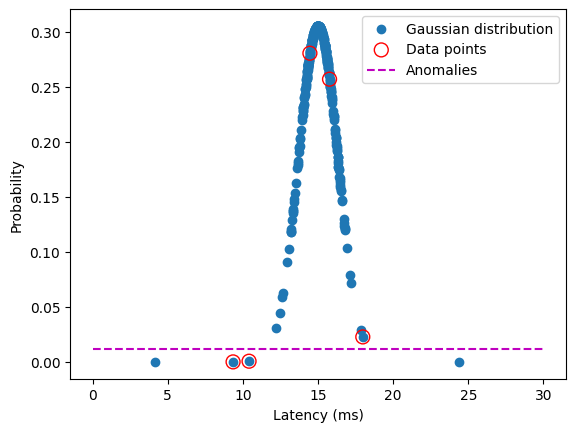

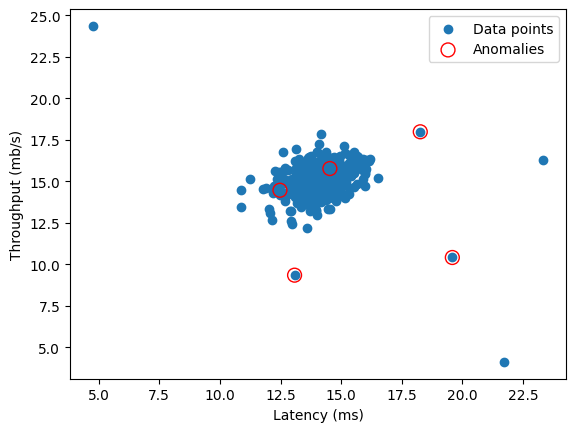

In [122]:
pval = normal_dist.pdf(Xval[:,1])
epsilon, f1 = select_threshold(pval, yval)
print("Epsilon: ", epsilon, "F1 score: ", f1)

outliers = np.where(pval < epsilon)
normal_dist = norm(X_result[0][1], X_result[1][1])
plt.scatter(X[:,1], normal_dist.pdf(X[:,1]), marker='o')
plt.scatter(X[outliers,1], normal_dist.pdf(X[outliers,1]), edgecolors='r', facecolors='none', s=100)
plt.plot(np.linspace(0,30,100),epsilon*np.ones(100), 'm--')
plt.xlabel('Latency (ms)')
plt.ylabel('Probability')
plt.legend(['Gaussian distribution', 'Data points', 'Anomalies', 'Threshold'])
plt.show()



plt.scatter(X[:,0], X[:,1])
plt.scatter(X[outliers,0], X[outliers,1], edgecolors='r', facecolors='none', s=100)
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.legend(['Data points', 'Anomalies'])
plt.show()
